In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import larp
import larp.io as lpio
import numpy as np

(-0.5, 737.5, 737.5, -0.5)

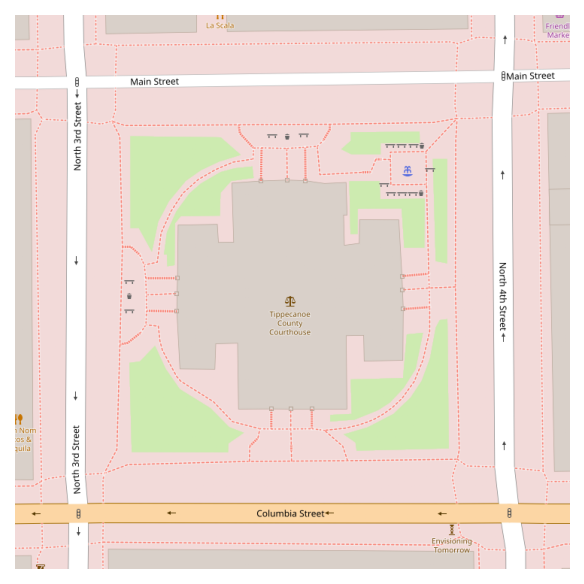

In [2]:
img = mpimg.imread('docs\demos\Lafayette City Hall\map.png')

plt.figure(dpi=150)
plt.imshow(img)
plt.axis(False)


In [3]:
  
field = lpio.loadRGeoJSONFile('docs\demos\Lafayette City Hall\city_hall.rgj')
field.reload_center_point(False)
field.center_point = np.array([738/2.0]*2)
field.size = np.array([738]*2)
display = field.to_image(resolution=400)

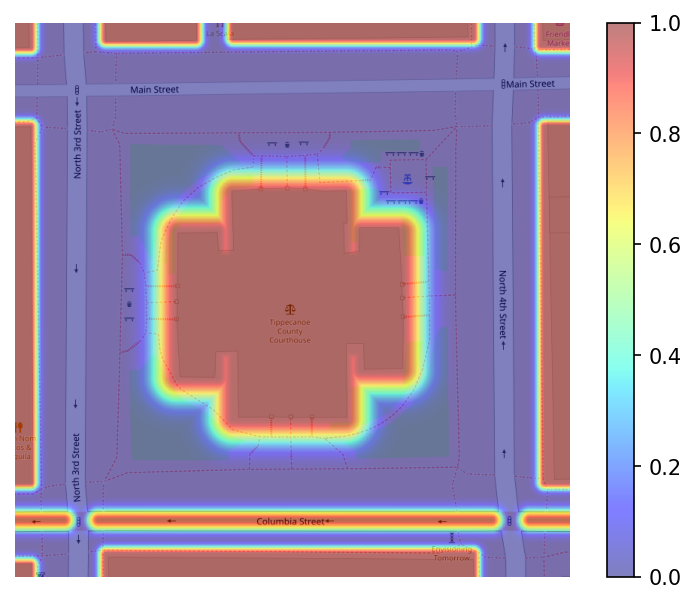

In [4]:

plt.figure(dpi=150)
plt.imshow(img, extent=field.get_extent())
plt.imshow(display, cmap='jet', alpha=0.5, extent=field.get_extent())
plt.axis(False)
plt.colorbar()
plt.clim(0.0,1.0)
plt.show()

In [5]:
edges = [0.2, 0.4, 0.6, 0.8]
quadtree = larp.quad.QuadTree(field, minimum_sector_length=2, maximum_sector_length=25, boundaries=edges)
quadtree.build()

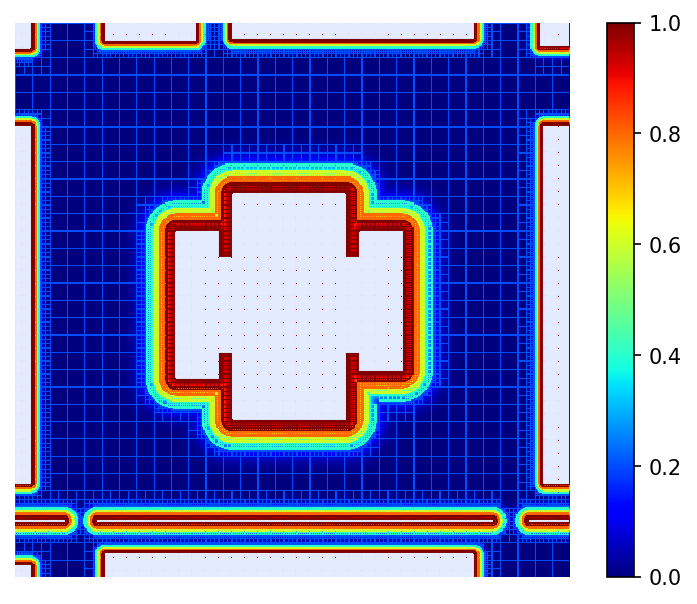

In [6]:
boundaries_lines = quadtree.to_boundary_lines_collection(margin=0.1)
boundaries_lines_zones = quadtree.get_quad_zones()


plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent())
plt.axis(False)
plt.colorbar().set_ticks([0.0] + edges + [1.0])
for i in range(0, len(boundaries_lines), 2):
    zone = boundaries_lines_zones[i//2]
    c = cm.jet(quadtree.ZONEToMaxRANGE[zone]) if zone > 0 else "#e4ebff"
    plt.plot(*boundaries_lines[i:i+2], c=c, alpha=1, linewidth=0.5)
plt.show()

In [7]:
routing_graph = larp.graph.RouteGraph(quadtree=quadtree, build_graph=True)

In [8]:
start = (50, 30) # (x, y)
end = (660, 660)
k=1.2

route = routing_graph.find_route(start, end, scale_tranform=lambda x: 1/(k*(1.0 - x + 1e-10)), alg="A*")
# route = routing_graph.find_route(start, end, scale_tranform=lambda x: x + 1, alg="A*")
print(f"Route found: {route is not None}")

Route found: True


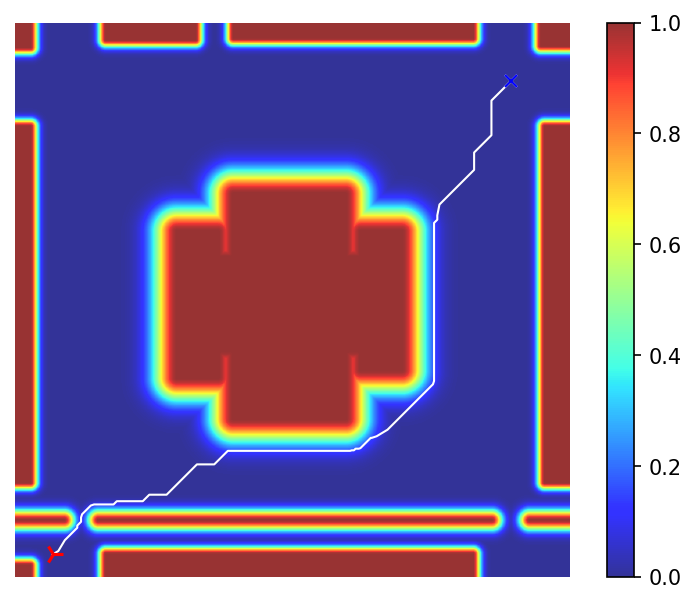

In [10]:
route_path = larp.graph.RouteGraph.route_to_lines_collection(start, end, route, remapped=True)

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.colorbar().set_ticks([0.0] + edges + [1.0])
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.axis(False)
plt.show()

In [14]:
# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-2)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

Distance traveled: 1050.8029475023154
Total area under route: 92.56092663347468
Average area under route: 0.08808590312149912
